We weill see how the quantum computer can be used in qryptography wil demostrating with the most fundemantel entity called  Random Number Generators. Aka RNGs.

- Topics: 
    - Qubits
    - bases of quantum states 
    - superposition of quantum states
    - quantum state art and measurement

Classical method for generating random numbers is based on the physical process of a coin toss or a dice roll.

Quantum method for generating random numbers is based on the quantum mechanical process of a qubit.

Computers can generate a randomm number based on mathemtical oirented algorithms can be predict or processed through classical information proccesing.

you may think its is simple but consider rolling a dice orpicking card without knowing whats under it maybe you are measuring brownian motion and repor findings right? -- Well it is also random number generator example in the basic form.

When you want to generate this random number on computer with using programs you will find yourself a dterministic pattern in the output.

If I run the same program (with the same parameters) twice I should expect the same result each time. So how do we bend the rules of these deterministic machines to perform our task of generating random numbers? The answer comes in the form of a type of algorithm called a pseudorandom number generator (PRNGs).

A PRNG is a deterministic algorithm that spits out numbers seemingly at "random". In fact, there are incredibly good PRNGs called Cryptographically Secure PRNGs that are used today in cryptography. However, there are two things which make a PRNG only pseudorandom, not truly random. First, a PRNG requires a seed from which the random string is generated. Using the same seed twice will result in the same string of random numbers (as the PRNG is a deterministic algorithm). Second, it is very hard to prove that, when the PRNG is run for a very long time, the numbers remain random. Therefore, when using a PRNG (for cryptographic purposes) the seeds should be periodically refreshed.

Now what is crucial here is the make  sure your PNRG in simple  make sure an adversary (someone trying to break your cryptographic system) cannot learn the seed that you choose as they would then be able to generate the same string of random numbers and break your system.

There are many different methods for generating seeds, your laptop might measure the temperature of it's CPU to a fine precision and use that as a seed. Alternatively, the company Cloudflare takes photos of a wall of lava lamps and uses the binary representation as seeds in their cybersecurity services.


## Quantum Random Number Generator

As far as we know, quantum processes can exhibit truly random behavior. So, if we had a quantum computer, is it possible to generate truly random numbers from a deterministic algorithm? The answer to this question is yes! Let's take a look at how.

basically we will be using 2 major pillar of quantum mechanics to achieve this, First will be  the Superpostions and  and No cloning theory (Also well know that the main post quantum cryptograhy will be built on heisenberg uncertainty principle and No cloning theorem)

If you're reading this you are likely familiar with the concept of a qubit, a unit of information used in quantum computers that can be in a superposition of both the 0 and 1 state simultaneously. More formally, a qubit is a 2-dimensional complex vector that can be represented as

|ψ⟩ = α|0⟩ + β|1⟩

where α and β are complex numbers that satisfy the normalization condition |α|^2 + |β|^2 = 1. The coefficients α and β represent the probability amplitudes for the qubit to be in the 0 or 1 state, respectively. (Please check the Dirac notation for more details to understand the notation)

## Vector Representation of a Qubit

A qubit is a 2-dimensional complex vector that can be represented as a vector in a 2-dimensional complex vector space.

{(1,0), (0,1)}

|0⟩ = [1,0]

|1⟩ = [0,1]

In fact, there are infinitely many bases for a vector space. In all of these basis, any point can be described by the linear combination of the basis vectors with some real coefficients.

## Hadamard Gate

The Hadamard gate is a 2x2 matrix that can be used to create a superposition of the 0 and 1 states.

H = 1/√2 [1 1, 1 -1]

Recalling the vector representation of a qubit, we can see that the Hadamard gate transforms the basis vectors of the computational basis into a superposition of the 0 and 1 states.

H|0⟩ = 1/√2 [1 1, 1 -1] [1,0] = 1/√2 [1,1] = |+⟩

H|1⟩ = 1/√2 [1 1, 1 -1] [0,1] = 1/√2 [1,-1] = |-⟩

## No Cloning Theorem

The No Cloning Theorem states that it is impossible to create an identical copy of an arbitrary unknown quantum state. This theorem is a consequence of the linearity of quantum mechanics and the fact that quantum states are described by complex vectors.

## Measuring qubits
For the final component of our algorithm, we are going to need to be able to measure qubits and be able to calculate the probability of obtaining a certain measurement.

Say I have a qubit  that I want to measure. The first thing I need to do is specify which basis I want my measurement in. We are familiar with the standard basis, and that seems like a good choice, so let's use that for now.

To calculate the probability of a quantum state  collapsing to a given state  when measured, we use the following equation  where  is the inner product of  and .

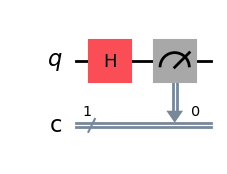

In [ ]:
### LEts first create a bases to perform superposition and no clonning theorem 
from qiskit import QuantumCircuit

qc = QuantumCircuit(1,1) #Lets have 1 qubit for simplified 
qc.h(0) #Apply hadamard gate to the qubit to perform a superpostion 
qc.measure(0,0) #Measure the qubit and store the result in the classical bit 0
qc.draw(output='mpl')


In [11]:
# Now lets simulate this behaviour to see the circuit
from qiskit import transpile
from qiskit_aer import AerSimulator

backend = AerSimulator() #You can use  real quantum hardware but we are going to use simulation for this one
qc_complied = transpile(qc, backend)
job_sim = backend.run(qc_complied)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_complied)
print(counts)


{'0': 515, '1': 509}
